In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("diff_data/cems_diffs_isorto.csv", index_col='DATE_UTC')

In [4]:
df['month'] = pd.DatetimeIndex(df.reset_index().DATE_UTC).month
df

,isorto,gload_mwh,so2_kg,nox_kg,pm25_kg,co2_kg,so2_dam_ap2,nox_dam_ap2,pm25_dam_ap2,so2_dam_eas,nox_dam_eas,pm25_dam_eas,co2_dam,month
DATE_UTC,,,,,,,,,,,,,,
2006-01-01 04:00:00,CAISO,-457.19,-0.896751,-43.825605,-8.436821,-1.895754e+05,-67.47,-599.11,-2143.44,-20.13,-439.39,-704.33,-7583.02,1
2006-01-01 04:00:00,ERCOT,-445.70,-1853.107025,-138.292036,-20.593100,-3.414690e+05,-26896.37,-1389.72,-1098.43,-32415.94,-570.31,-1110.50,-13658.76,1
2006-01-01 04:00:00,ISONE,-142.25,-525.355244,4.911948,-13.607775,-6.402186e+04,-9197.51,-2.10,-686.60,-19812.15,-119.35,-1604.94,-2560.88,1
2006-01-01 04:00:00,MISO,-169.00,-211.712705,-208.724441,-30.753571,-1.617302e+05,-4707.34,-3325.18,-1928.43,1374.61,1266.81,-3062.00,-6469.21,1
2006-01-01 04:00:00,NYISO,10.00,-180.070127,0.725747,-3.084429,1.016047e+04,1075.29,350.25,-51.44,-5182.87,501.45,-369.88,406.42,1
2006-01-01 04:00:00,PJM,-808.00,-6289.007267,-870.852188,-153.495702,-7.530543e+05,-211670.60,-2728.00,-13393.04,-168173.27,-5457.41,-16897.22,-30122.17,1
2006-01-01 04:00:00,SPP,-292.84,-685.507693,-202.878547,-15.785019,-2.835207e+05,-7078.50,-906.04,-425.93,-12898.78,-1013.24,-762.76,-11340.83,1
2006-01-01 05:00:00,CAISO,11.28,0.014061,20.844367,0.635029,8.872269e+03,14.33,336.65,604.63,1.04,223.43,108.85,354.89,1
2006-01-01 05:00:00,ERCOT,-340.85,-3079.445613,-425.296024,-20.683818,-3.199306e+05,-21627.04,-3661.55,-140.65,-55008.13,-1303.57,-1041.33,-12797.22,1


In [16]:
df['cos_month'] = np.cos((df.month)*(2*np.pi/12))
df['sin_month'] = np.sin((df.month)*(2*np.pi/12))

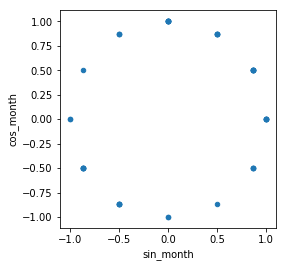